# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/leaf.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 leaf.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [1]:
import numpy as np
import random
from matplotlib.axes._axes import _log as matplotlib_axes_logger

with open('dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?`

In [2]:

print('Train:', train.shape)
print('Test:', test.shape)


for i in range(40):
    print("For", i+1 , "count:", len(train[train[:, 0] == i+1]))
"""
<TU ODPOWIEDZ NA PYTANIE>
Nie ma danych dla 37, 38,39,40,16,17,18,19,20,21
"""

Train: (2244, 16)
Test: (1496, 16)
For 1 count: 77
For 2 count: 66
For 3 count: 55
For 4 count: 66
For 5 count: 77
For 6 count: 44
For 7 count: 44
For 8 count: 33
For 9 count: 121
For 10 count: 88
For 11 count: 88
For 12 count: 77
For 13 count: 99
For 14 count: 66
For 15 count: 66
For 16 count: 0
For 17 count: 0
For 18 count: 0
For 19 count: 0
For 20 count: 0
For 21 count: 0
For 22 count: 121
For 23 count: 77
For 24 count: 77
For 25 count: 66
For 26 count: 99
For 27 count: 55
For 28 count: 66
For 29 count: 110
For 30 count: 77
For 31 count: 77
For 32 count: 66
For 33 count: 66
For 34 count: 99
For 35 count: 88
For 36 count: 33
For 37 count: 0
For 38 count: 0
For 39 count: 0
For 40 count: 0


'\n<TU ODPOWIEDZ NA PYTANIE>\nNie ma danych dla 37, 38,39,40,16,17,18,19,20,21\n'

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [3]:
# train[:, 0] == 3
# <UZUPEŁNIJ>
# train_new = np.vstack((train[train[:, 0] == 3], train[train[:, 0] == 5]))
# test_new = np.vstack((test[test[:, 0] == 3], test[test[:, 0] == 5]))
train_new = train[(train[:, 0] == 3) | (train[:, 0] == 5)]
test_new = test[(test[:, 0] == 3) | (test[:, 0] == 5)]
# train_new = train[train[:, 0] == 3]
# test_new = test[test[:, 0] == 3]=]

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
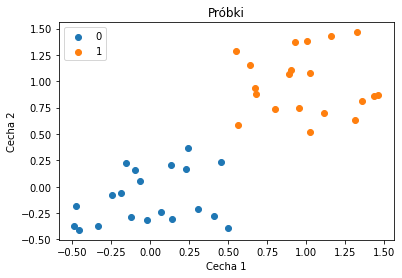

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

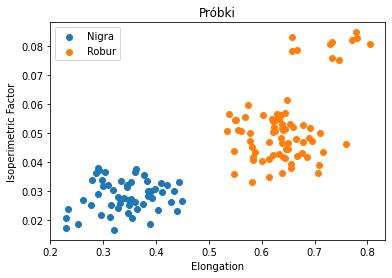

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Próbki")
plt.xlabel(f"Elongation")
plt.ylabel(f"Isoperimetric Factor")


klasy = [3, 5]
name = {3: 'Nigra', 5: 'Robur'}
for i in klasy:
    data_plt = train_new[train_new[:, 0] == i]
    plt.scatter(x=data_plt[:,4], 
                y=data_plt[:,8], 
                label=name[i])

plt.legend()   

### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `p1` oraz `p2` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [5]:
# <UZUPEŁNIJ PONIZEJ>
features = [1, 2] # kolumny o indeksach 1, 2
p1 = [0, 2, 3]
p2 = [0, 5, 6]

def edist(p1, p2, features):
    p1_new = []
    p2_new = []
    distance = 0
    
    for i in features:
        p1_new.append(p1[i])
        p2_new.append(p2[i])
    
    for i in range(len(p1_new)):
        distance += (p1_new[i] - p2_new[i])**2
        
    return distance**0.5

edist(p1, p2, features) # 4.242640687119285

4.242640687119285

### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


In [6]:
def k_nearest(features):
    classified = np.zeros([len(test), 3])
    for i in range(len(test)):
        nearest = 100
        for j in range (len(train)):
            distance = edist(test[i], train[j], features)
            if distance < nearest:
                nearest = distance
                classified[i] = [train[j][0],test[i][features[0]] ,test[i][features[1]]]
    return classified

features = [4,8]
classified = k_nearest(features)


classified

array([[8.00000000e+00, 9.04440000e-01, 2.08970000e-02],
       [3.50000000e+01, 5.22690000e-01, 1.00970000e-02],
       [3.40000000e+01, 9.13970000e-01, 8.21080000e-02],
       ...,
       [3.40000000e+01, 8.81590829e-01, 1.53941039e-02],
       [3.50000000e+01, 5.60630293e-01, 2.97831087e-02],
       [1.40000000e+01, 5.46916089e-01, 3.79772847e-05]])

### Zadanie 7
Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

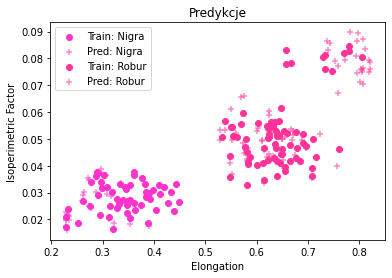

In [7]:
matplotlib_axes_logger.setLevel('ERROR')

def show_plot(klasy, nazwy, feature):
    color = []
    for i in range(41):
        color.append((random.randint(0,5)/5,random.randint(0,5)/5,random.randint(0,5)/5))

    plt.title("Predykcje")
    plt.xlabel("Elongation")
    plt.ylabel("Isoperimetric Factor")
    for i in klasy:
        plt.scatter(x=train[train[:,0] == i][:,feature[0]],
                    y=train[train[:,0] == i][:,feature[1]],
                    label='Train: '+ nazwy[i],
                    c = color[i])
    
        plt.scatter(x=classified[classified[:,0] == i][:,1],
                    y=classified[classified[:,0] == i][:,2],
                    label='Pred: '+nazwy[i],
                    c = color[i],
                    marker ='+',
                    alpha=0.6)
    plt.legend()

    
klasy = [3,5]
nazwy = {3: 'Nigra', 5: 'Robur'} 
feature = [4,8] 
show_plot(klasy,nazwy,feature)

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [8]:
def accuracy(classified,features):
    correct = (test[:,0] == classified[:,0])
    correct = np.count_nonzero(correct)
    print(f'Accuracy dla klasyfikacji na podstawie cech {features}: {correct/len(test) : .1%}')

accuracy(classified,features)

Accuracy dla klasyfikacji na podstawie cech [4, 8]:  30.7%


### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty doku w wkleić w komórkę poniżej zmieniając liczbę klas.

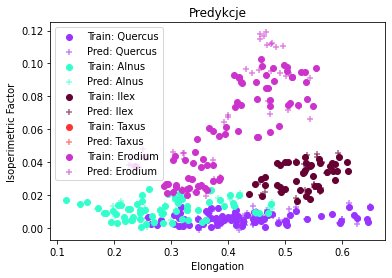

In [9]:
klasy = [1,4,7,17,23]
nazwy = {1: 'Quercus', 4: 'Alnus',7: 'Ilex', 17:'Taxus',23:'Erodium'} 
feature = [4,8]  
show_plot(klasy,nazwy,feature)

### Zadanie 10

Przeprowadź eksperyment ponownie dla większej liczby cech.

In [19]:
characteristics = [[5,6],[12,14],[8,9],[9,15]]
for characteristic in characteristics:
    classified = k_nearest(characteristic)
    accuracy(classified,characteristic)

Accuracy dla klasyfikacji na podstawie cech [5, 6]:  11.1%
Accuracy dla klasyfikacji na podstawie cech [12, 14]:  11.4%
Accuracy dla klasyfikacji na podstawie cech [8, 9]:  13.6%
Accuracy dla klasyfikacji na podstawie cech [9, 15]:  22.1%


### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

Algorytm najbliższego sąsiada nie jest najlepszy dla klasyfikacji i kategoryzacji zmiennych testowych. Celność rośnie w zależności od zbioru, który wybraliśmy. Warto wybierać zbiory, które nie nakładaja się na siebie wtedy celność jest większa